In [2]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# FUNCTIONS

In [2]:
def describe_in_xarray(ds: xr.Dataset):
    print(f"\t\t Mean \t   Std \t     Min\tMax")
    for var_name, variable in ds.data_vars.items():
        # We only calculate the stats for numeric variables
        mean = variable.mean().values
        std = variable.std().values
        min = variable.min().values
        max = variable.max().values
        print(f"{var_name:<10}     {mean:^7.3f}   {std:^7.3f}   {min:^7.3f}   {max:^7.3f}")

In [3]:
def print_nan_calculatations(ds: xr.Dataset):
    for var_name, data_array in ds.data_vars.items():
        # Calculate the total number of NaN and non-NaN values
        total_nan = data_array.isnull().sum().item()
        total_non_nan = data_array.notnull().sum().item()

        # Calculate the total number of elements
        total_elements = data_array.size

        # Calculate percentages
        nan_percentage = (total_nan / total_elements) * 100
        non_nan_percentage = (total_non_nan / total_elements) * 100

        # Print the results
        print(f"{var_name:<10} Total NaNs: {total_nan:^10} Total Non-Nan: {total_non_nan:^10} NaN Percentage: {nan_percentage:^4.2f}%   Non-NaN Percentage: {non_nan_percentage:^4.2f}%")

# SSM LST Exploratory Data Analysis

In [3]:
# Only a few months to check
path_SL_01_18 = "../data/raw/SSM_LST_01_2018.nc"
path_SL_02_18 = "../data/raw/SSM_LST_02_2018.nc"

In [4]:
ds = xr.open_dataset(path_SL_01_18)
ds2 = xr.open_dataset(path_SL_02_18)
ds = xr.concat([ds, ds2], dim="time")


In [5]:
ds

<xarray.Dataset>
Dimensions:    (longitude: 71, latitude: 41, time: 1416)
Coordinates:
  * longitude  (longitude) float32 -8.0 -7.9 -7.8 -7.7 ... -1.3 -1.2 -1.1 -1.0
  * latitude   (latitude) float32 39.0 38.9 38.8 38.7 ... 35.3 35.2 35.1 35.0
  * time       (time) datetime64[ns] 2018-01-01 ... 2018-02-28T23:00:00
Data variables:
    stl1       (time, latitude, longitude) float32 281.3 281.9 ... 284.3 283.9
    tp         (time, latitude, longitude) float32 0.001718 ... 1.593e-06
    swvl1      (time, latitude, longitude) float32 0.2324 0.3148 ... 0.3336
Attributes:
    Conventions:  CF-1.6
    history:      2023-11-22 01:45:49 GMT by grib_to_netcdf-2.24.0: /opt/ecmw...

In [ ]:
ds.head()

In [ ]:
print("Dataset Info:")
print(ds.info())


En la sección de variables distinguimos las de coordenadas (longitude, latitude y time) y las de datos (stl1, tp y swvl1). Nos indican el tipo de datos y las unidades.


In [100]:
# Just to make sure that the date values are indeed correct (from January to February)
print(ds["time"].min().values)
print(ds["time"].max().values)

2018-01-01T00:00:00.000000000
2018-02-28T23:00:00.000000000


In [134]:
# Because we don't have an specific .describe() method for xarray.Dataset
describe_in_xarray(ds)

		 Mean 	   Std 	     Min	Max
stl1           281.540    4.197    271.161   301.860
tp              0.001     0.003     0.000     0.052 
swvl1           0.296     0.076     0.038     0.520 


In [105]:
print_nan_calculatations(ds)

stl1       Total NaNs:  1588752   Total Non-Nan:  2533224   NaN Percentage: 38.54%   Non-NaN Percentage: 61.46%
tp         Total NaNs:  1588752   Total Non-Nan:  2533224   NaN Percentage: 38.54%   Non-NaN Percentage: 61.46%
swvl1      Total NaNs:  1588752   Total Non-Nan:  2533224   NaN Percentage: 38.54%   Non-NaN Percentage: 61.46%


NaNs???
Given that there is a value for each hour, a mean or LCF for inputing NaNs might work
Or just a straight NaN drop

In [ ]:
# To drop NaNs, it's necessary to convert it first to a pandas dataframe or an xarary dataArary
df = ds.to_dataframe()
df = df.dropna()

Standardization (Z-Score)

In [ ]:
for var in ds.data_vars:
    ds[var] = (ds[var] - ds[var].mean()) / ds[var].std()

# FAPAR NVIDI Exploratory Data Analysis

In [22]:
path_fapar = "../data/raw/003-00073-00-00_BIOPAR_FAPAR_V2_GLOBAL_2006_05_08_2021_09_23.txt"
path_nvdi = "../data/raw/003-00073-00-00_BIOPAR_NDVI_V2_GLOBAL_2006_05_08_2021_09_23.txt"

In [23]:
ds_fapar = pd.read_csv(path_fapar, sep="\t", index_col=0, parse_dates=["date"])
ds_nvdi = pd.read_csv(path_nvdi, sep="\t", index_col=0, parse_dates=["date"])

In [24]:
ds_fapar = ds_fapar.rename(columns={"value": "fapar"})
ds_nvdi = ds_nvdi.rename(columns={"value": "nvdi"})
ds_fapar.describe()

,date,fapar
count,510,510.000000
mean,2013-06-05 00:16:56.470588160,0.252902
min,2006-05-10 00:00:00,0.104000
25%,2009-11-22 12:00:00,0.188000
50%,2013-06-05 00:00:00,0.252000
75%,2016-12-17 12:00:00,0.315000
max,2020-06-30 00:00:00,0.460000
std,NaN,0.080305


In [25]:
ds_nvdi.describe()

,date,nvdi
count,528,521.000000
mean,2013-09-05 08:13:38.181818368,0.345190
min,2006-05-11 00:00:00,0.220000
25%,2010-01-08 12:00:00,0.300000
50%,2013-09-06 00:00:00,0.340000
75%,2017-05-03 12:00:00,0.380000
max,2021-01-01 00:00:00,0.548000
std,NaN,0.057982


In [26]:
ds_fapar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 0 to 509
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    510 non-null    datetime64[ns]
 1   fapar   510 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.0 KB


In [27]:
ds_nvdi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 528 entries, 0 to 527
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    528 non-null    datetime64[ns]
 1   nvdi    521 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 12.4 KB


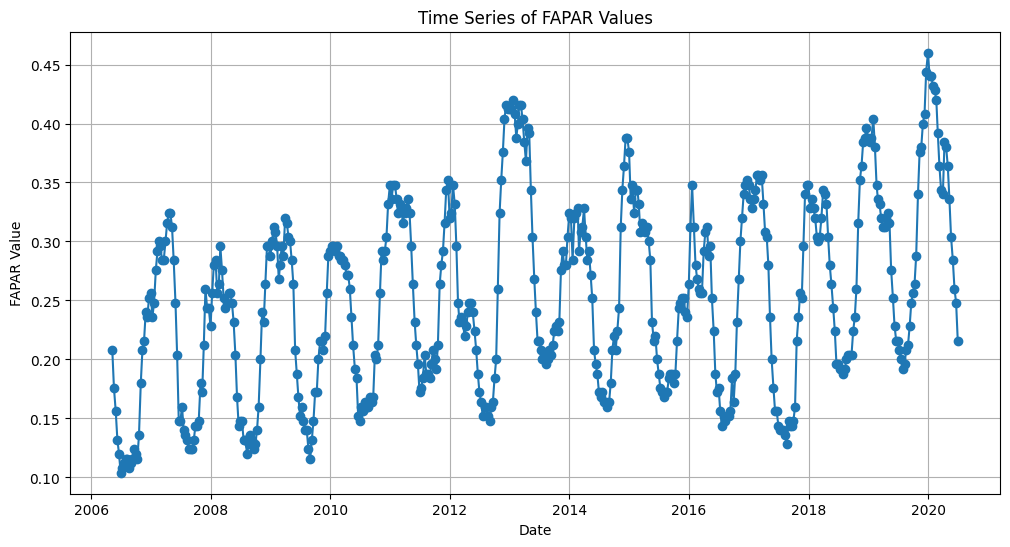

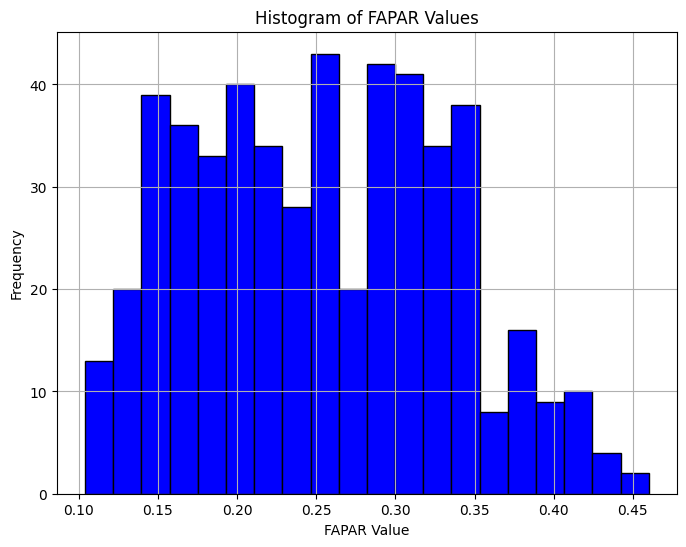

In [28]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(ds_fapar['date'], ds_fapar['fapar'], marker='o', linestyle='-')
plt.title('Time Series of FAPAR Values')
plt.xlabel('Date')
plt.ylabel('FAPAR Value')
plt.grid(True)
plt.show()

# Histogram of distribution
plt.figure(figsize=(8, 6))
plt.hist(ds_fapar['fapar'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of FAPAR Values')
plt.xlabel('FAPAR Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

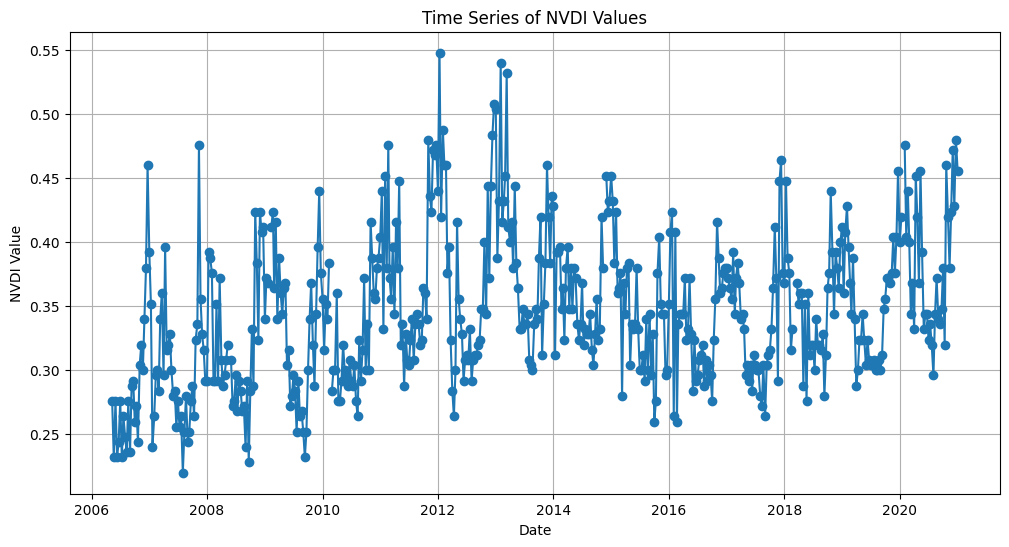

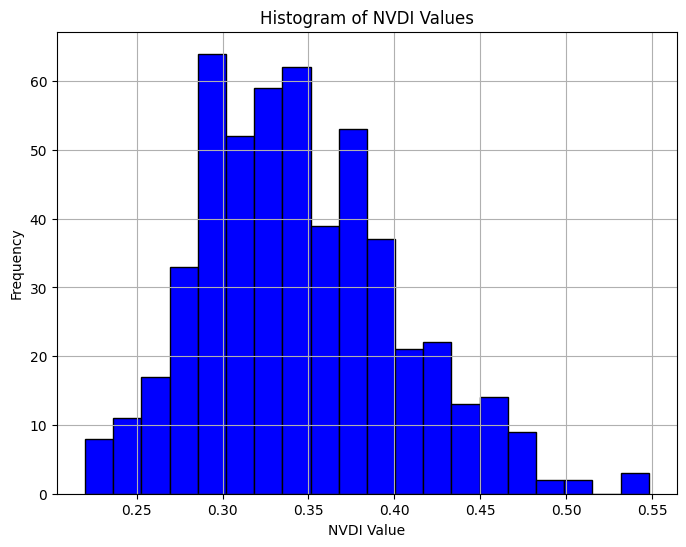

In [29]:
# Time Series Plot
plt.figure(figsize=(12, 6))
plt.plot(ds_nvdi['date'], ds_nvdi['nvdi'], marker='o', linestyle='-')
plt.title('Time Series of NVDI Values')
plt.xlabel('Date')
plt.ylabel('NVDI Value')
plt.grid(True)
plt.show()

# Histogram of distribution
plt.figure(figsize=(8, 6))
plt.hist(ds_nvdi['nvdi'], bins=20, color='blue', edgecolor='black')
plt.title('Histogram of NVDI Values')
plt.xlabel('NVDI Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

NaNs??
In this case, the time between each value is 10 days apart, doing a mean or LCF wouldn't be a good solution
The best solution might be to drop them